In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
data = pd.read_csv('../data/diabetes.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[cols] = imputer.fit_transform(df[cols])

In [8]:
df['Insulin_log'] = np.log1p(df['Insulin'])
df = df.drop(columns=['Insulin'])

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,32.455208,0.471876,33.240885,0.348958,4.827137
std,3.369578,30.438286,12.096642,8.791221,6.875177,0.331329,11.760232,0.476951,0.494893
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000,2.708050
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000,4.808086
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000,4.836282
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000,4.853976
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000,6.741701


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [15]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[79 21]
 [30 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154

Accuracy: 0.6688311688311688


In [19]:
dt_tuned = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_tuned.fit(X_train, y_train)
y_pred_tuned = dt_tuned.predict(X_test)


In [20]:
cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))


Confusion Matrix:
 [[78 22]
 [13 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.65      0.76      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

Accuracy: 0.7727272727272727


The baseline Decision Tree showed moderate accuracy (66.9%) but struggled to identify diabetic patients, achieving a recall of only 44% for Outcome = 1. After tuning key hyperparameters such as max depth and minimum samples per leaf, the model’s performance improved significantly. The tuned model achieved an accuracy of 77.3% and improved diabetic recall to 76%, indicating better generalization and reduced overfitting. This makes the tuned Decision Tree more suitable for diabetes prediction.

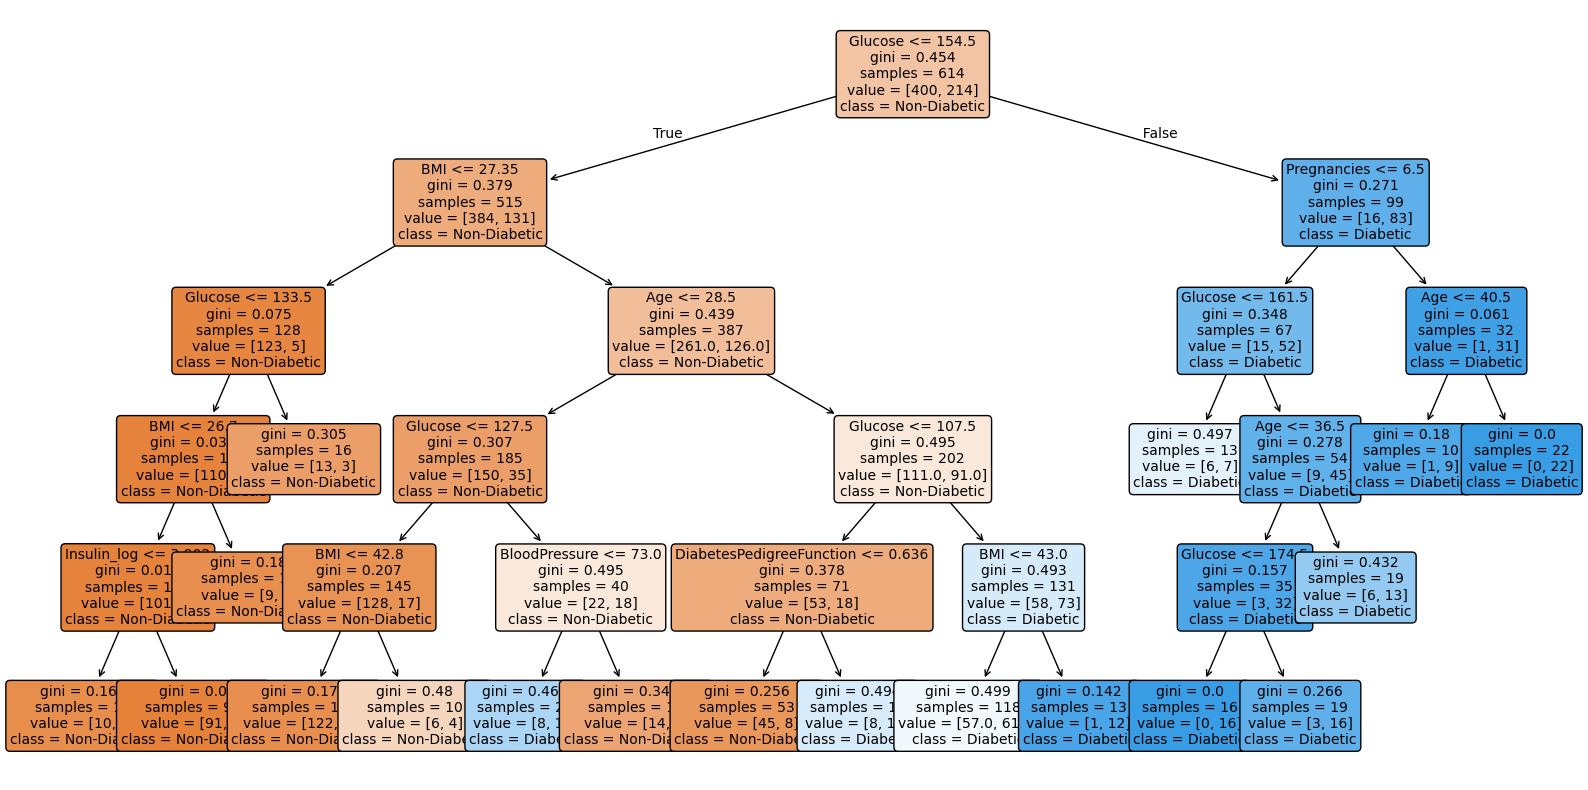

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_tuned,                      # your trained decision tree
    feature_names=X.columns,       # feature names
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
